# Koneoppiminen: Osa 6: Koneoppimismallien vertailu (max 15 p)

In [1]:
# Kirjoita tähän tietosi!
student_name = Timo Laakkonen
student_id = AA4598


Tehtävässä vertaillaan eri koneoppimismenetelmät (kuusi eri menetelmää) samalle datalle.
Tallennetaan tulokset ja analysoidaan ne.
Esitetään tuloksia myös visuaalisesti (Ennustetarkkuus, sekaannusmatriisi, ROC-käyrä).
Lisäksi vertaillaan saatuja tuloksia sekä pohditaan tuloksia sanallisesti.

## Aineisto: Äänet

Tiedostossa [voice.csv](./voice.csv) on mittaustietoja äänistä (kenttien selitykset tiedostossa ovat englanniksi).

Pyri ennustamaan kentän `label (male/female)` arvoa muiden kenttien avulla eri koneoppimismenetelmien avulla.

Jaa data opetusdataan ja testidataan suhteessa 80/20%.

* Tulosta myös kuinka paljon eri kentät vaikuttavat mallin mukaan ennustettavaan muuttujaan (*importances*).
* Valitse sitten kaksi tärkeintä selittävää muuttujaa ja tulosta näistä scatter-kaavio niin että *male/female* -pisteet ovat eri värillä.

## Tehtävä 6.1
### Datan esikäsittely (2 pistettä)

Tutustu aineistoon ja toteuta datan esikäsittely.
* Esikäsittelyn toteutuksessa kannattaa huomioida, että `male` ja `female` kenttien arvot oltava numeerisia koneoppimisvaiheessa

In [2]:
# TODO: Kirjoita toteutuksesi tähän soluun.

# omia höpinöitä
# Datan skaalattu ennen koneoppimista (yleensä skaalataan data standardinormaalijakaumaan)
# luennot/aihe_0_koneoppiminen/datan_esikasittely_koneoppimisessa.ipynb

import pandas as pd

df = pd.read_csv("voice.csv",delimiter=",")
df['label'] = df['label'].replace({'male':1 ,'female':0})
df.fillna(0,inplace=True)

df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


## Tehtävä 6.2
### Koulutus- ja testiaineisto (2 pistettä)

Tehdään datan jako opetus- ja testijoukkoon sekä skaalataan numeerinen data.

In [3]:
# TODO: Kirjoita toteutuksesi tähän soluun.

#X_train, X_test, y_train, y_test = None

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,plot_roc_curve

# tarvitaanko??
columns=df.columns


X = df.drop('label', axis=1)
y = df['label']
#display(X)
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#print("skaalattu")
#display(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2) #, random_state=1150)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# vai skaalataanko X ja sitten vasta split kokiele tuleeko sama vastaus vissiin kyllä

#print(X_train)
#print("---------------------------------------------------------")
#X = df.drop('label', axis=1)
#y = df['label']
#display(X)
#scaler = StandardScaler()
#X = scaler.fit_transform(X) 
## eikös yykin pidä skaalata???
## tämän mukaan ei tsekkaa muistakin esimerkeistä
#https://gitlab.labranet.jamk.fi/ttc8050/koneoppiminen-materiaalit/-/blob/main/esimerkit/regressio/bank_loan_logistic_regression.ipynb

#KOKEILE yhen kentän skaalausta tekemällä uusi kenttä kokeile molempi menetelmiä standard ja minmax
'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Oletuksena skaalaus välille [0, 1]
df_minmax['Numbers_minmax_sk'] = scaler.fit_transform(df_scaled['Numbers'].values.reshape(-1, 1))
df_minmax.head(5)
'''


#print("skaalattu")

#mms = MinMaxScaler().fit(X)
#X=mms.transform(X_train)
#X = MinMaxScaler().fit(X).transform(X_train)
#X_train = pd.DataFrame(mms.transform(X_train), columns=columns[1:])

#display(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2) #, random_state=1150)

#print("ihmettelen että train_test_split:iin voidaan ilman headereita (siis ei dataframe) laittaa dataa")
#pd.DataFrame(mms.transform(X_train), columns=feature_columns[1:])
#Bayes:
#Vinkki: älä skaalaa luokkamuuttujaa.Vinkki: muista että luokkamuuttuja menee y-alkuisiin muuttujiin.    




#mms = MinMaxScaler().fit(X_train)

#X_train = pd.DataFrame(mms.transform(X_train), columns=columns[1:])
#X_test = pd.DataFrame(mms.transform(X_test), columns=columns[1:])
#print(X_train)

#https://gitlab.labranet.jamk.fi/ttc8050/koneoppiminen-materiaalit/-/blob/main/luennot/aihe_4_randomforest/satunnaismetsa.md
#importances = model.feature_importances_
#for i in range(len(importances)):
#    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))


"\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()  # Oletuksena skaalaus välille [0, 1]\ndf_minmax['Numbers_minmax_sk'] = scaler.fit_transform(df_scaled['Numbers'].values.reshape(-1, 1))\ndf_minmax.head(5)\n"

## Tehtävä 6.3
### Mallien rakentaminen (6 pistettä)

Ajetaan eri oppimismenetelmät samalle datalle ja tallennetaan tulokset.
Tässä tehtävässä käytetään seuraavia menetelmiä:
1. Päätöspuu
2. Tukivektorikone eli SVM
3. k lähintä naapuria eli kNN
4. Naiivi Nayes Bayes
5. Satunnaismetsä eli RandomForest
6. PCA - osa 6 esimerkin aihe

Laske kaikissa menetelmissä luokittelutuloksien **tarkkuus** ja **sekaannusmatriisi**.


0.6514195583596214
[[200 107]
 [114 213]]


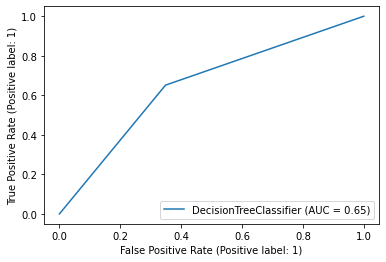

In [11]:
# TODO: Malli 1: Päätöspuun toteutus

# https://www.geeksforgeeks.org/decision-tree/
# mihin tarvitaan
#from sklearn.datasets import make_classification
#from sklearn import tree
#from sklearn.model_selection import train_test_split
# tämä
from sklearn.tree import DecisionTreeClassifier #,plot_tree

#model = tree.DecisionTreeClassifier()
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#print(predicted_value)

# tämä alkuun
from sklearn.metrics import confusion_matrix,accuracy_score
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)
plot_roc_curve(model, X_test, y_test)
plt.show()

#plot_tree(model)

0.6813880126182965
[[221  86]
 [116 211]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


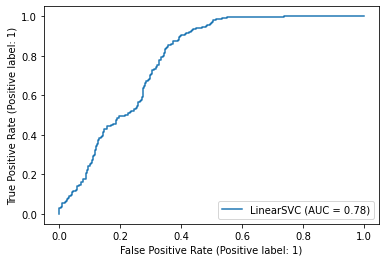

In [12]:
# TODO: Malli 2: Tukivektorikoneen toteutus
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=1000) # asetettu maksimi-iteraatioiden määrä
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)
plot_roc_curve(svm, X_test, y_test)
plt.show()


0.6309148264984227
[[224  83]
 [151 176]]


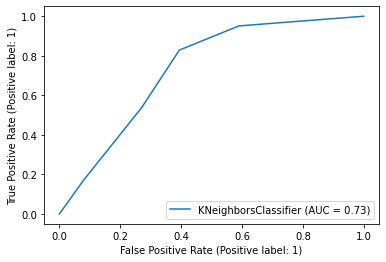

In [13]:
# TODO: Malli 3: kNN toteutus
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) # HUOM parametri
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)
import matplotlib.pyplot as plt
plot_roc_curve(knn, X_test, y_test)
plt.show()


0.7034700315457413
[[215  92]
 [ 96 231]]


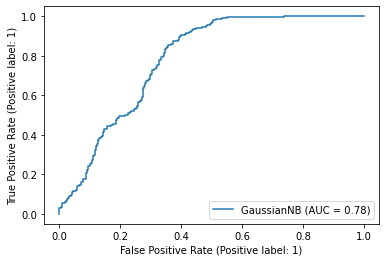

In [14]:
# TODO: Malli 4: Bayes toteutus
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)

plot_roc_curve(gnb, X_test, y_test)
plt.show()


0.6451104100946372
[[204 103]
 [122 205]]
0.6451104100946372
[[204 103]
 [122 205]]


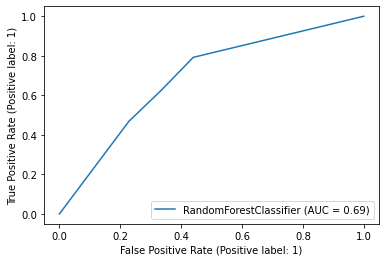

In [15]:
# TODO: Malli 5: Satunnaismetsän toteutus
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=3, random_state=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=3, random_state=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)
plot_roc_curve(regressor, X_test, y_test)
plt.show()


0.6892744479495269
[[221  86]
 [111 216]]


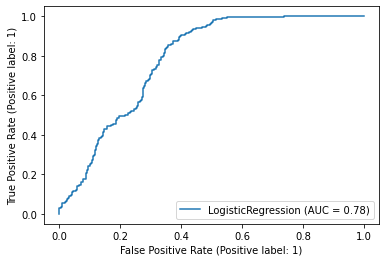

In [16]:
# TODO: Malli 6: PCA yhdistettynä johonkin luokittelumalliin
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 1)
  
pca.fit_transform(X_train)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#print(X_test)



from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)

plot_roc_curve(classifier, X_test, y_test)
plt.show()



#from sklearn.linear_model import LogisticRegression  
  
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

## Tehtävä 6.4
### Tulosten analysointi ja käsittely (5 p)

* Verrataan eri menetelmistä saatuja tuloksia toisiinsa
* Pyri myös hakemaan keskeiset piirteet
   * Piirrä jokin soveltuva kuvio kahden tärkeimmän selittävän muuttujan avulla
* Piirrä myös ROC - käyrät eri menetelmiä käytettäessä ja vertaa, miten eri koneoppimismenetelmissä etenee.
* Sanallinen pohdinta: Miten kehittäisit tai parantaiset oppimistuloksia?

#### Vastaus: Tulosten tulkinta

* TODO: TULOSTEN SANALLISTA TULKINTAA VASTATEN KYSYMYKSIIN, JOITA TEHTÄVÄSSÄ ESITETTY

importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))


Tsekkaa jokin kevään 7tehtävä tms. jossa mahd. verrantoja

* TODO: MUUTAKIN SAA TÄHÄN KOMMENTOIDA TEHTÄVÄÄN LIITTYEN.

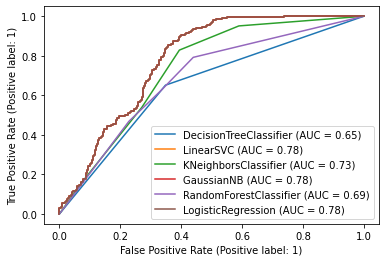

In [19]:
#fig = plt.figure(figsize=(8,6))
disp=plot_roc_curve(model, X_test, y_test)
plot_roc_curve(svm, X_test, y_test,ax=disp.ax_)
plot_roc_curve(knn, X_test, y_test,ax=disp.ax_)
plot_roc_curve(gnb, X_test, y_test,ax=disp.ax_)
plot_roc_curve(regressor, X_test, y_test,ax=disp.ax_)
plot_roc_curve(classifier, X_test, y_test,ax=disp.ax_)

plt.show()

#import warnings
#warnings.filterwarnings('ignore')